# Apple Leave Disease Detection Model using MobileNet

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 4.3 MB/s eta 0:00:10
    --------------------------------------- 0.5/38.8 MB 6.2 MB/s eta 0:00:07
    --------------------------------------- 0.9/38.8 MB 8.4 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.8 MB 9.4 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.8 MB 10.4 MB/s eta 0:00:04
   --- ------------------------------------ 2.9/38.8 MB 11.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.3/38.8 MB 14.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.7/38.8 MB 16.6 MB/s eta 0:00:03
   ------- -------------------------------- 7.4/38.8 MB 19.7 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/38.8 MB 23.2 MB/s eta 0:00:02
   ------------ --------------------------- 12.1/38.8 MB 36.4 MB/s eta 0:00:

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 3.1/390.2 MB 49.7 MB/s eta 0:00:08
    --------------------------------------- 8.0/390.2 MB 84.5 MB/s eta 0:00:05
   - ------------------------------------- 12.8/390.2 MB 108.8 MB/s eta 0:00:04
   - ------------------------------------- 17.7/390.2 MB 131.2 MB/s eta 0:00:03
   -- ------------------------------------ 22.5/390.2 MB 131.2 MB/s eta 0:00:03
   -- ------------------------------------ 27.4/390.2 MB 108.8 MB/s eta 0:00:04
   --- ----------------------------------- 32.2/390.2 MB 108.8 MB/s eta 0:00:04
   --- ----------------------------------- 37.0/390.2 MB 131.2 MB/s eta 0:00:03
   ---- ---------------------------------- 41.8/390.2 MB 131.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Load and Prepare the Dataset

In [1]:
import glob
import cv2
import numpy as np

In [2]:
# Initialize lists to hold the images and labels
Apple_Apple_scab = []
Apple_Black_rot = []
Apple_Cedar_apple_rust = []
Apple_healthy = []

# Load apple scab images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Apple_scab/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Apple_scab.append(img)

# Load apple black rot images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Black_rot/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Black_rot.append(img)

# Load cedar apple rust images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Cedar_apple_rust/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Cedar_apple_rust.append(img)

# Load apple healthy images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___healthy/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_healthy.append(img)

In [3]:
# Convert lists to numpy arrays
Apple_Apple_scab = np.array(Apple_Apple_scab)
Apple_Black_rot = np.array(Apple_Black_rot)
Apple_Cedar_apple_rust = np.array(Apple_Cedar_apple_rust)
Apple_healthy = np.array(Apple_healthy)
d_s = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy))

In [4]:
Apple_Apple_scab.shape

(630, 224, 224, 3)

In [5]:
Apple_Black_rot.shape

(621, 224, 224, 3)

In [6]:
Apple_Cedar_apple_rust.shape

(275, 224, 224, 3)

In [7]:
Apple_healthy.shape

(989, 224, 224, 3)

In [8]:
d_s.shape

(2515, 224, 224, 3)

In [9]:
np.random.choice(10, 5, replace=False)

array([4, 1, 8, 5, 3])

## Visualize the Dataset

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
def plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5):
    Apple_Apple_scab_imgs = Apple_Apple_scab[np.random.choice(Apple_Apple_scab.shape[0], num, replace=False)]
    Apple_Black_rot_imgs = Apple_Black_rot[np.random.choice(Apple_Black_rot.shape[0], num, replace=False)]
    Apple_Cedar_apple_rust_imgs = Apple_Cedar_apple_rust[np.random.choice(Apple_Cedar_apple_rust.shape[0], num, replace=False)]
    Apple_healthy_imgs = Apple_healthy[np.random.choice(Apple_healthy.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Apple scab')
        plt.imshow(Apple_Apple_scab_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Black rot')
        plt.imshow(Apple_Black_rot_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Cedar apple rust')
        plt.imshow(Apple_Cedar_apple_rust_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple healthy')
        plt.imshow(Apple_healthy_imgs[i])

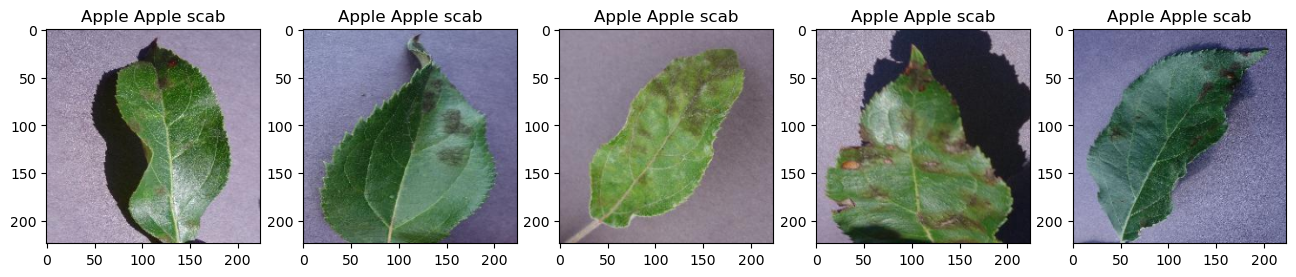

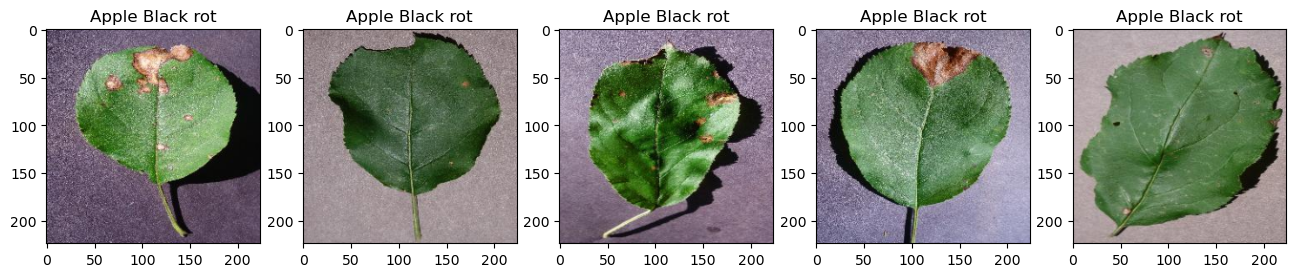

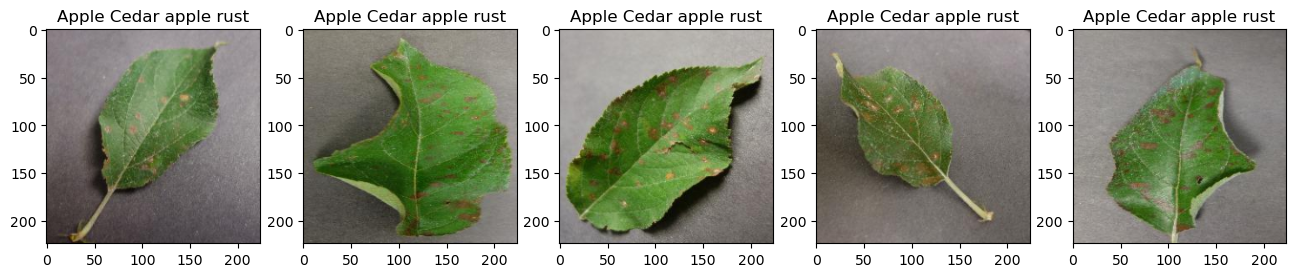

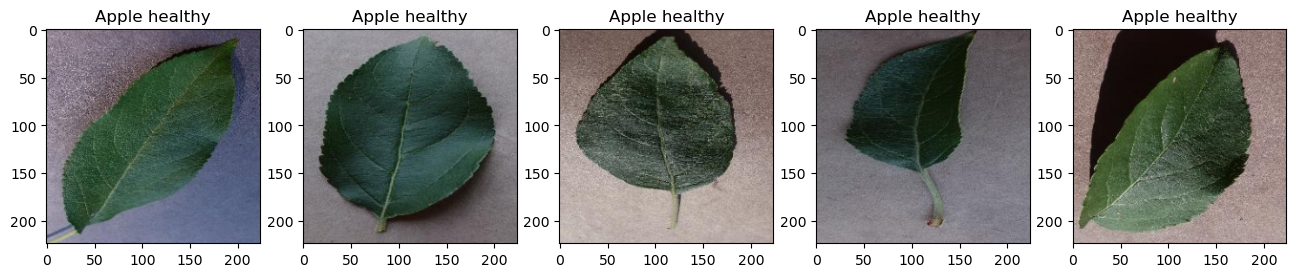

In [12]:
plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5)

In [13]:
# Prepare labels
Apple_Apple_scab_labels = np.full(len(Apple_Apple_scab), 0)
Apple_Black_rot_labels = np.full(len(Apple_Black_rot), 1)
Apple_Cedar_apple_rust_labels = np.full(len(Apple_Cedar_apple_rust), 2)
Apple_healthy_labels = np.full(len(Apple_healthy), 3)

In [14]:
# Concatenate data and labels
images = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy), axis=0)
labels = np.concatenate((Apple_Apple_scab_labels, Apple_Black_rot_labels, Apple_Cedar_apple_rust_labels, Apple_healthy_labels), axis=0)

In [15]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define MobileNet Model with Transfer Learning and Untrainable Base

In [18]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [19]:
# Load the MobileNet architecture with pre-trained ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = False

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model architecture
model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,580 (12.82 MB)

 Trainable params: 131,716 (514.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Train the MobileNet Model

In [20]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.3426 - loss: 1.7337 - val_accuracy: 0.8211 - val_loss: 0.6348
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.7114 - loss: 0.7101 - val_accuracy: 0.9026 - val_loss: 0.3771
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.8449 - loss: 0.4417 - val_accuracy: 0.9324 - val_loss: 0.2698
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.8821 - loss: 0.3549 - val_accuracy: 0.9443 - val_loss: 0.2100
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9191 - loss: 0.2696 - val_accuracy: 0.9523 - val_loss: 0.1803
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9273 - loss: 0.2186 - val_accuracy: 0.9463 - val_loss: 0.1621
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9480 - loss: 0.1884 - val_accuracy: 0.9563 - val_loss: 0.1372
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.9508 - loss: 0.1628 - val_accuracy: 

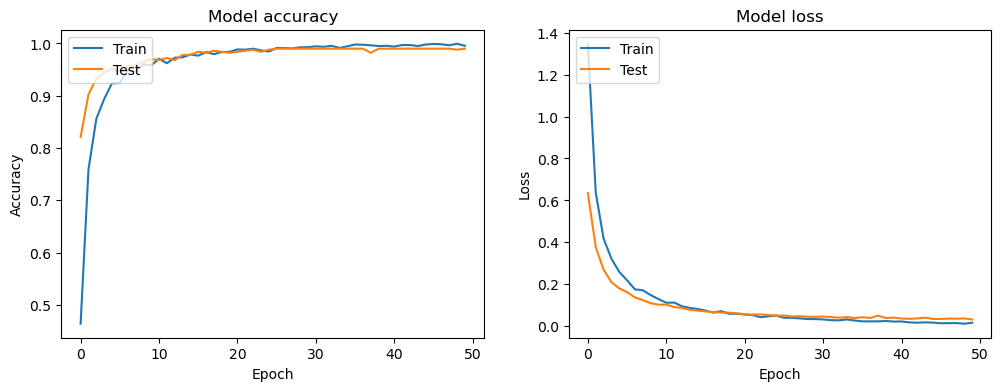

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [22]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9948 - loss: 0.0211
Test Loss: 0.0319
Test Accuracy: 0.9901


In [23]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']


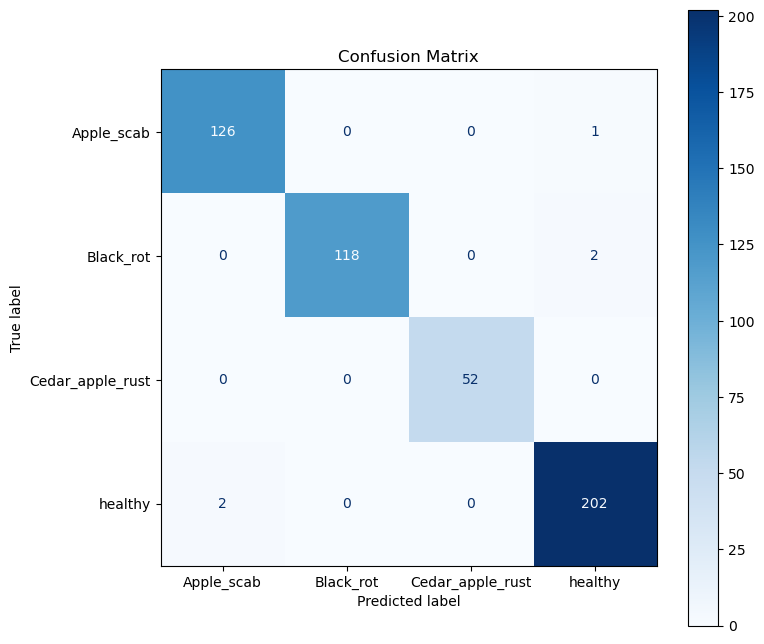

In [26]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.98      0.99      0.99       127
       Black_rot       1.00      0.98      0.99       120
Cedar_apple_rust       1.00      1.00      1.00        52
         healthy       0.99      0.99      0.99       204

        accuracy                           0.99       503
       macro avg       0.99      0.99      0.99       503
    weighted avg       0.99      0.99      0.99       503



# Define MobileNet Model with Transfer Learning and Trainable Base

In [29]:
# Load the MobileNet architecture with pre-trained ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the base model's layers to train them initially
base_model.trainable = True

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,580 (12.82 MB)

 Trainable params: 3,338,692 (12.74 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [30]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 623ms/step - accuracy: 0.3708 - loss: 1.6515 - val_accuracy: 0.4771 - val_loss: 1.1320
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 617ms/step - accuracy: 0.6157 - loss: 0.9100 - val_accuracy: 0.5885 - val_loss: 0.8456
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 627ms/step - accuracy: 0.7627 - loss: 0.5971 - val_accuracy: 0.7913 - val_loss: 0.4980
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 638ms/step - accuracy: 0.8462 - loss: 0.4207 - val_accuracy: 0.9046 - val_loss: 0.3036
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 649ms/step - accuracy: 0.9035 - loss: 0.2945 - val_accuracy: 0.9543 - val_loss: 0.1908
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 642ms/step - accuracy: 0.9279 - loss: 0.2389 - val_accuracy: 0.9801 - val_loss: 0.1331
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 650ms/step - accuracy: 0.9415 - loss: 0.2008 - val_accuracy: 0.9821 - val_loss: 0.1002
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - accuracy: 0.9643 - loss: 0.1457 - val_accu

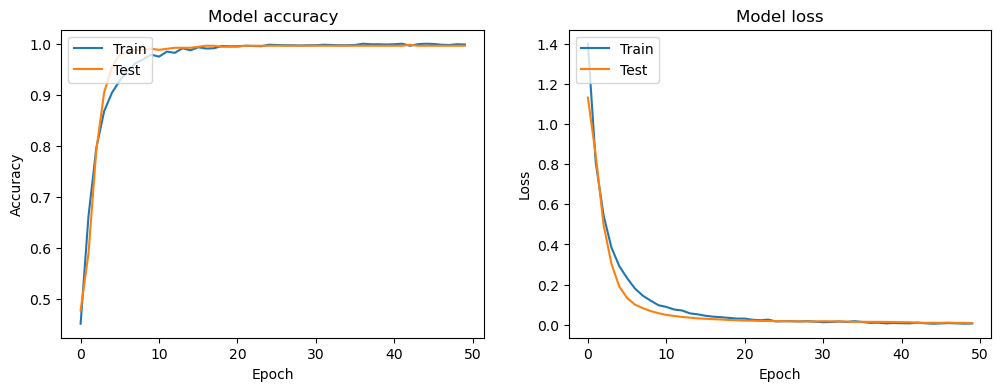

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [32]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9984 - loss: 0.0043
Test Loss: 0.0080
Test Accuracy: 0.9960


In [33]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step


In [34]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']

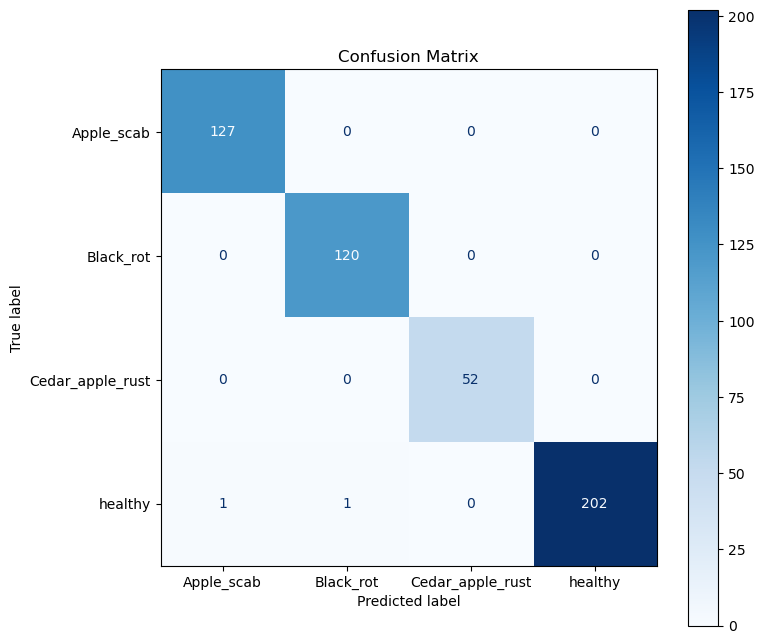

In [35]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [36]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.99      1.00      1.00       127
       Black_rot       0.99      1.00      1.00       120
Cedar_apple_rust       1.00      1.00      1.00        52
         healthy       1.00      0.99      1.00       204

        accuracy                           1.00       503
       macro avg       1.00      1.00      1.00       503
    weighted avg       1.00      1.00      1.00       503



# Define the MobileNet Model with Transfer Learning, Trainable Base and a Learning Rate Scheduler Callback

In [38]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [39]:
# Load the MobileNet architecture with pre-trained ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the base model's layers to train them initially
base_model.trainable = True

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Define a learning rate scheduler
initial_lr = 0.001
def lr_schedule(epoch):
    return initial_lr * math.exp(-0.1 * epoch)

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model
model.compile(optimizer=Adam(learning_rate=initial_lr), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,580 (12.82 MB)

 Trainable params: 3,338,692 (12.74 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [40]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, callbacks=[lr_scheduler], validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 641ms/step - accuracy: 0.8484 - loss: 0.3819 - val_accuracy: 0.5089 - val_loss: 6.3095 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 633ms/step - accuracy: 0.9727 - loss: 0.1167 - val_accuracy: 0.9185 - val_loss: 0.5122 - learning_rate: 9.0484e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 637ms/step - accuracy: 0.9845 - loss: 0.0447 - val_accuracy: 0.9861 - val_loss: 0.0923 - learning_rate: 8.1873e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 646ms/step - accuracy: 0.9957 - loss: 0.0186 - val_accuracy: 0.9622 - val_loss: 0.1316 - learning_rate: 7.4082e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 653ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9920 - val_loss: 0.0219 - learning_rate: 6.7032e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 658ms/step - accuracy: 0.9967 - loss: 0.0055 - val_accuracy: 0.9960 - val_loss: 0.0091 - learning_rate: 6.0653e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 655ms/step - accurac

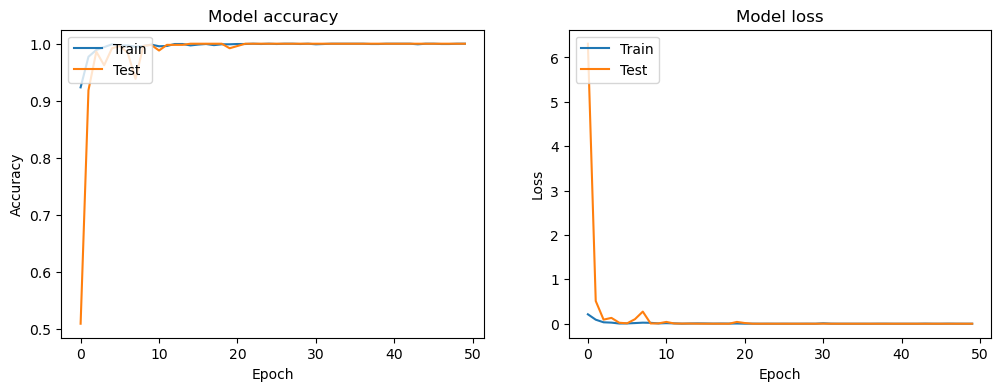

In [46]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [49]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 1.0000 - loss: 1.3509e-04
Test Loss: 0.0001
Test Accuracy: 1.0000


In [50]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step


In [51]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']

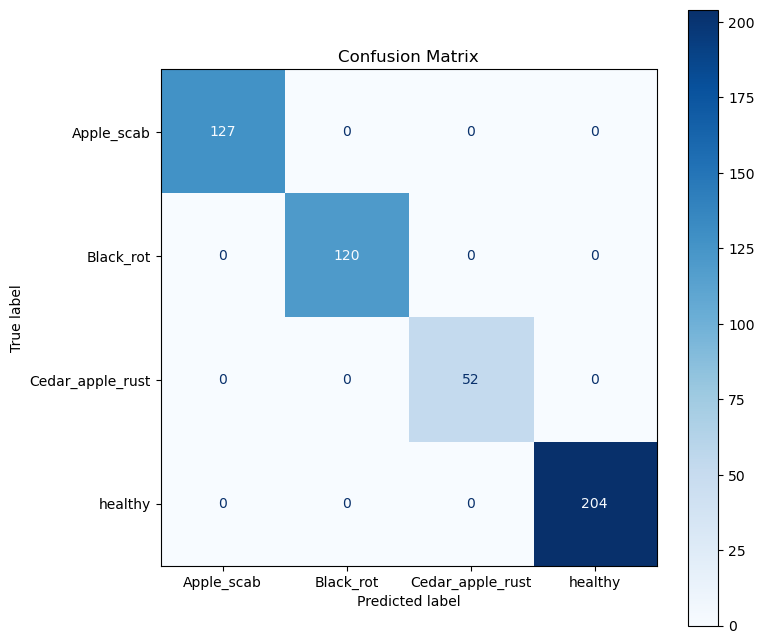

In [52]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [54]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       1.00      1.00      1.00       127
       Black_rot       1.00      1.00      1.00       120
Cedar_apple_rust       1.00      1.00      1.00        52
         healthy       1.00      1.00      1.00       204

        accuracy                           1.00       503
       macro avg       1.00      1.00      1.00       503
    weighted avg       1.00      1.00      1.00       503

